# Week 10 Homework, Heather Leighton-Dick

### 1.	Explain the dot product and cross product in your own words in markdown. Use LaTeX to properly show the equations.

The dot product is a measure of how much of two (or more) vectors are going in the same direction. The smaller the dot product, the less collinearity the vectors have, and the larger the dot product, the more the vectors are headed in the same direction (approaching parallel in 2D). The dot product of two vectors is the product of the lengths of each vector multiplied by the cosine of the angle between the vectors.

\begin{equation}v • w = ||v||•||w||•cos\theta\end{equation}

The cross product is a measure of how perpendicular two (or more) vectors are; the smaller the cross product, the less perpendicular they are, and the larger the cross product, the more perpendicular (orthogonal) they are.

\begin{equation}v x w = ||v||•||w||•sin\theta\end{equation}

In [5]:
import numpy as np
import numpy.linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

### 2.	Write a function called angle_between (v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated.

In [65]:
def angle_between(v1, v2):
    try:
        dotproduct = np.dot(v1, v2)
        v1mag = LA.norm(v1)
        v2mag = LA.norm(v2)
        magprod = v1mag * v2mag
        cos = dotproduct / magprod
        if magprod == 0:
            print("Can't divide by 0.")
        else:
            angle = np.arccos(np.clip(cos, -1.0, 1.0))
            return(angle)
    except Exception as e:
        print(e)

#deg = np.rad2deg(angle)

In [66]:
v1 = ([3,6,9])
v2 = ([5,6,7])
print(angle_between(v1,v2))

0.2523447284105255


### 3.	Write a function called row_dot (A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2, and then returns the dot product of the r1 and r2 rows (indexing starts at 0).

In [51]:
A = np.array([[4,5,6],[4,5,6],[7,8,9]])

def row_dot(A, r1, r2):
    try:
        dotprod = np.dot(r1, r2)
    except Exception as e:
        return 0
    return dotprod
print(row_dot(A, A[1],A[2]))

122


### 4.	Write a function called matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?

In [150]:
m1 = np.array([[3,3,3],[4,4,4]])
m2 = np.array([[1,1,1], [2,2,2]])
def matrix_division(m1, m2):
    try:
        result = np.divide(m1, m2)
    except Exception as e:
        return 0
    return result

print(matrix_division(m1, m2))

#C_inverse = np.linalg.inv(C)
#print( C_inverse)

[[3. 3. 3.]
 [2. 2. 2.]]


There is a difference between divison and true division in Python. [Also, matrix division is the same as multiplying by the inverse of a matrix.
#https://www.tutorialspoint.com/matrix-manipulation-in-python]

### 5.	Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol, and 0 otherwise. 

In [91]:
###"for this question, you can use tol as a stopping condition."

def angle_between(v1, v2):
    v1=a.ravel()
    v2=b.ravel()
    try:
        dotproduct = np.dot(v1, v2)
        v1mag = LA.norm(v1)
        v2mag = LA.norm(v2)
        magprod = v1mag * v2mag
        cos = dotproduct / magprod
        if magprod == 0:
            print("Can't divide by 0.")
        else:
            angle = np.arccos(np.clip(cos, -1.0, 1.0))
            return(angle)
    except Exception as e:
        print(e)


def is_orthogonal(v1, v2, tol):
    if tol > 0 and tol > np.absolute(np.pi/2 - (angle_between(v1, v2))):
            return (1)
    elif tol <= 0:
            return("Unacceptable tolerance value.")
    else:
            return(0)


In [94]:
# Test cases for problem 5
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])
# output: 1
is_orthogonal(a,b, 0.01)

1

In [88]:
# output: 0
is_orthogonal(a,b, 0.001)

0

In [89]:
# output: 0
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
is_orthogonal(a,b, 0.01)

0

In [90]:
# output: 1
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
is_orthogonal(a,b, 1e-10)

1

In [92]:
# my test
a = np.array([[3],[3]])
b = np.array([[0.3],[0.3]])
is_orthogonal(a,b, 0.01)

0

### 6.	Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 1 and 4 above (angle_between and is_orthogonal). 
### (Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 1 and 4.)

In [120]:
class vector_calculator:
    def __init__ (self, v1, v2):
        self.v1 = v1
        self.v2 = v2
        self.angle_between = angle_between(v1,v2)
        self.is_orthogonal = is_orthogonal(v1,v2, tol=0.001)

    def vector_calc(self):
        print("The angle between v1 and v2 is " + str(self.angle_between)+".")
        print("The orthogonality of v1 and v2 is " + str(self.is_orthogonal)+".")

# my test
a = np.array([[5],[5]])
b = np.array([[11],[11]])
tol = 0.01

t1 = vector_calculator(a,b)
print(t1.vector_calc())


#default tol > 0
#not sure why it's printing None.


The angle between v1 and v2 is 0.0.
The orthogonality of v1 and v2 is 0.
None


In [121]:
#test from #5
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
is_orthogonal(a,b, 1e-10)
t1 = vector_calculator(a,b)
print(t1.vector_calc())

The angle between v1 and v2 is 1.5707963267948966.
The orthogonality of v1 and v2 is 1.
None


### 7.	Show a graphical representation of the breast cancer data outlined in this reading https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers!

Principal Component Analysis (PCA) is a probability/statistics technique which reduces large amounts of data to show patterns that describe, reveal, and approximate the overall shape and patterns of the original data. PCA computes the principal components, a sequence of vectors of which one is the line that best fits the data and is orthogonal to a portion of the vectors in the sequence. Some data is lost when using PCA, but the amount of loss is adjustable based on the needs of the study.

In [6]:
#Copy code from linked reading to pull the data into my notebook and clean it.
from sklearn.datasets import load_breast_cancer

In [7]:
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [8]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

In [10]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [56]:
#original reading's PCA calculations
from sklearn.preprocessing import StandardScaler

x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)

# My adjustment of the n_components to 4
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=4)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns=("principal component 1", "principal component 2", "principal component 3", "principal component 4"))


In [53]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))


Explained variation per principal component: [0.44272026 0.18971182 0.09393163 0.06602135]


### Note Regarding the Number of Components:
In the linked reading's PCA, ~44% of data is contained in one component, ~19% in the second, 
and ~36.8% of data was lost. I adjusted the code to use 4 principal components in an effort to incorporate more of the original data; ~44% of data is contained in the first component, ~19% in the second, ~9% in the third, ~6% in the fourth, and ~22% was lost. This adjustment brings the PCA overall of the data to 78% (just over 3/4 of the original set).

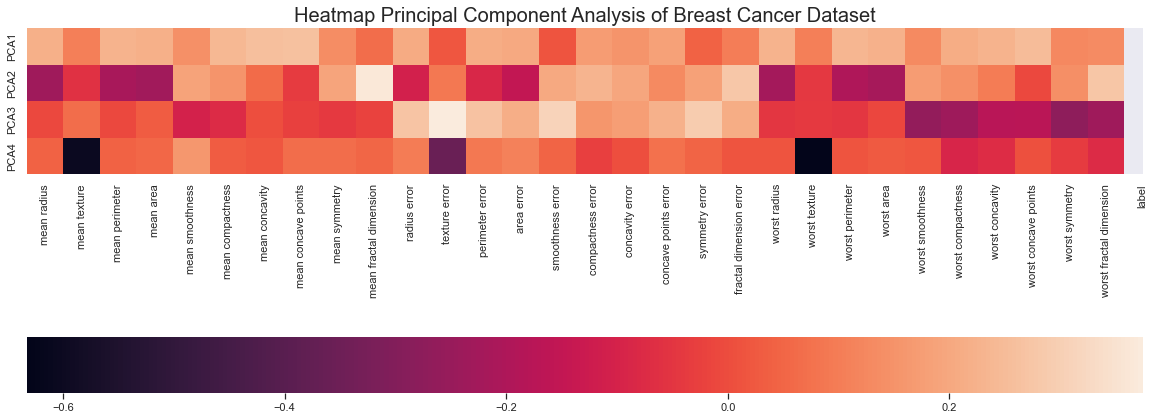

In [55]:
## A heatmap of the breast_dataset.
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
ax = sns.heatmap(pca_breast.components_, yticklabels=[ "PCA"+str(x) for x in range(1,pca_breast.n_components_+1)],
                 xticklabels=list(breast_dataset.columns), ax=ax, cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title("Heatmap Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
plt.show()
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)



## Observations from the heatmap:
Overall, the gradient seems to be larger values from PCA1 to PCA4 from left to right. There seem to be slightly higher values in the lower right of the map, and the mean texture, worst texture, and worst concave points seem to be abnormally darker.

### The page below helped me figure out what to feed the heatmap, and its explanation of PCA is not too shabby either. (I was surprised and interested by the warning that popped up when I ran the webpage's code regarding the ethical use of the housing data set gathered in Boston.)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets 

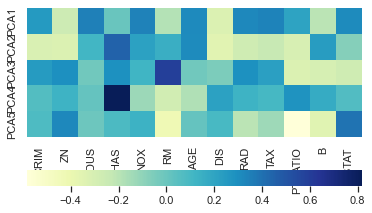

In [39]:
#https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(boston)
x = pd.DataFrame(x, columns=boston_dataset.feature_names)

from sklearn.decomposition import PCA
pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(x)
pca.shape
pcamodel.explained_variance_

ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(x.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")